In [1]:
# Imports
%load_ext autoreload
%autoreload 2

from os.path import exists
from pathlib import Path

import math

import numpy as np

import matplotlib.pyplot as plt

import torch
import torch.nn as nn # Includes all modules, nn.Linear, nn.Conv2d, BatchNorm etc
import torch.optim as optim # Is used for otimization algorithms such as Adam, SGD ...
from torch.utils.data import DataLoader # Helps with managing datasets in mini batches
from torch.utils.data import Dataset

import torchvision
import torchvision.datasets as datasets # Has standard datasets
import torchvision.transforms as transforms # Transformations to be used on images
import torchvision.transforms as T
import torchvision.transforms.functional as F
from torchvision.models import vgg19

from itertools import chain
from PIL import Image

from model import Generator, Discriminator # Models
from loss import VGGContentLoss
from datahandler import DataHandler
from modelhandler import ModelHandler
from utils import display_image, save_result_images
from train import train_loop
import config

In [2]:
print("cuda is available: " + str(torch.cuda.is_available()))
device = config.DEVICE
print("Device is set to: " + str(config.DEVICE))

cuda is available: True
Device is set to: cuda


Text(0.5, 1.0, 'High res (96 x 96 px)')

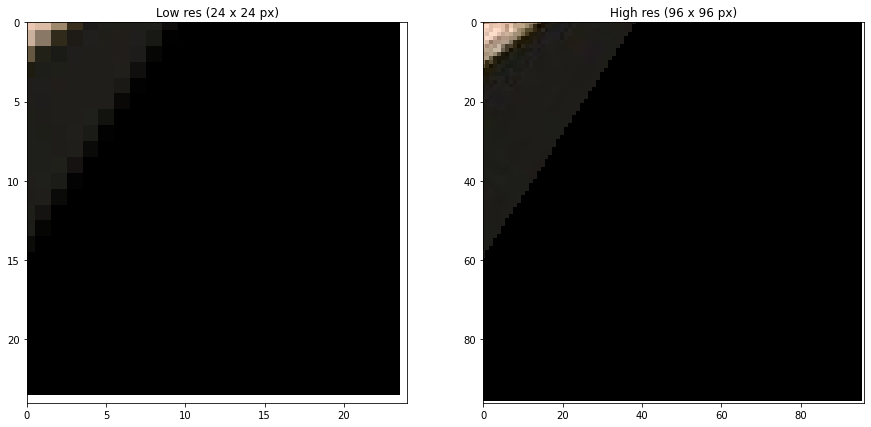

In [3]:
# The Dataset constructor has a transform attribute, we will cover it below. Just use this for now:
high_res_size = 96
low_res_size = 24

example_dataset = DataHandler("./dataset/", high_res_size ,low_res_size);
fig, axis = plt.subplots(1,2, figsize=(15,15))
some_random_index = 4
high_res_image_tensor, low_res_image_tensor = example_dataset[some_random_index]
display_image(axis[0], low_res_image_tensor)
axis[0].set_title('Low res (' + str(low_res_size) + ' x ' + str(low_res_size) + ' px)')
display_image(axis[1], high_res_image_tensor, reverse_normalization = True)
axis[1].set_title('High res (' + str(high_res_size) + ' x ' + str(high_res_size) + ' px)')

In [4]:
# Initialize models (with ModelHandler)
model_handler = ModelHandler()
generator, discriminator, disc_opti, gen_opti, gen_opti_pretrain, config_dict = model_handler.load_models()

# Initialize data
datahandler = DataHandler("./dataset/", config_dict['HIGH_RES_SIZE'] ,config_dict['LOW_RES_SIZE']);
train_dataloader = DataLoader(datahandler, batch_size=config_dict['BATCH_SIZE'], shuffle=True)

Load procedure initialized..
Enter stem of path (leave empty for new models): 
Loading models from scratch
high_res_size:           96
low_res_size:            24
scaling_factor:          2
batch_size:              32
num_epochs_train:        150
num_epochs_pretrain:     50
gen_lr:                  0.0001
gen_lr_pretrain:         0.001
disc_lr:                 0.0001
use_inception_blocks:    False
pixel_weight:            0.001
content_weight:          0.006
adversarial_weight:      0.001


In [5]:
# TRAINING TIME!
# Generator training (Pretraining)
generator, discriminator, disc_opti, gen_opti, gen_opti_pretrain, config_dict = train_loop(train_dataloader, generator, discriminator,  disc_opti, gen_opti, gen_opti_pretrain, config_dict, adversarial=False)

# Adversarial training (Regular Training)
generator, discriminator, disc_opti, gen_opti, gen_opti_pretrain, config_dict = train_loop(train_dataloader, generator, discriminator,  disc_opti, gen_opti, gen_opti_pretrain, config_dict, adversarial=True)

##################
Starting GENERATOR training
##################


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1/50][50/157]	Loss_G: 0.0689


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1/50][100/157]	Loss_G: 0.0553


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1/50][150/157]	Loss_G: 0.0446


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2/50][50/157]	Loss_G: 0.0453


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2/50][100/157]	Loss_G: 0.0569


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2/50][150/157]	Loss_G: 0.0314


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3/50][50/157]	Loss_G: 0.0343


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3/50][100/157]	Loss_G: 0.0245


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3/50][150/157]	Loss_G: 0.0473


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4/50][50/157]	Loss_G: 0.0311


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4/50][100/157]	Loss_G: 0.0298


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4/50][150/157]	Loss_G: 0.0273


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5/50][50/157]	Loss_G: 0.0237


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5/50][100/157]	Loss_G: 0.0185


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5/50][150/157]	Loss_G: 0.0379


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6/50][50/157]	Loss_G: 0.0234


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6/50][100/157]	Loss_G: 0.0228


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6/50][150/157]	Loss_G: 0.0242


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7/50][50/157]	Loss_G: 0.0175


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7/50][100/157]	Loss_G: 0.0273


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7/50][150/157]	Loss_G: 0.0283


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[8/50][50/157]	Loss_G: 0.0277


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[8/50][100/157]	Loss_G: 0.0206


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[8/50][150/157]	Loss_G: 0.0229


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9/50][50/157]	Loss_G: 0.0147


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9/50][100/157]	Loss_G: 0.0212


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9/50][150/157]	Loss_G: 0.0222


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[10/50][50/157]	Loss_G: 0.0129


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[10/50][100/157]	Loss_G: 0.0223


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[10/50][150/157]	Loss_G: 0.0253


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[11/50][50/157]	Loss_G: 0.0197


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[11/50][100/157]	Loss_G: 0.0206


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[11/50][150/157]	Loss_G: 0.0243


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[12/50][50/157]	Loss_G: 0.0192


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[12/50][100/157]	Loss_G: 0.0251


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[12/50][150/157]	Loss_G: 0.0154


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[13/50][50/157]	Loss_G: 0.0205


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[13/50][100/157]	Loss_G: 0.0173


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[13/50][150/157]	Loss_G: 0.0188


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[14/50][50/157]	Loss_G: 0.0207


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[14/50][100/157]	Loss_G: 0.0232


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[14/50][150/157]	Loss_G: 0.0161


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[15/50][50/157]	Loss_G: 0.0164


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[15/50][100/157]	Loss_G: 0.0141


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[15/50][150/157]	Loss_G: 0.0216


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[16/50][50/157]	Loss_G: 0.0308


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[16/50][100/157]	Loss_G: 0.0147


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[16/50][150/157]	Loss_G: 0.0212


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[17/50][50/157]	Loss_G: 0.0234


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[17/50][100/157]	Loss_G: 0.0189


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[17/50][150/157]	Loss_G: 0.0255


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[18/50][50/157]	Loss_G: 0.0175


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[18/50][100/157]	Loss_G: 0.0218


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[18/50][150/157]	Loss_G: 0.0267


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[19/50][50/157]	Loss_G: 0.0237


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[19/50][100/157]	Loss_G: 0.0168


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[19/50][150/157]	Loss_G: 0.0198


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[20/50][50/157]	Loss_G: 0.0211


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[20/50][100/157]	Loss_G: 0.0197


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[20/50][150/157]	Loss_G: 0.0184


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[21/50][50/157]	Loss_G: 0.0186


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[21/50][100/157]	Loss_G: 0.0217


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[21/50][150/157]	Loss_G: 0.0233


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[22/50][50/157]	Loss_G: 0.0154


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[22/50][100/157]	Loss_G: 0.0245


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[22/50][150/157]	Loss_G: 0.0166


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[23/50][50/157]	Loss_G: 0.0157


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[23/50][100/157]	Loss_G: 0.0150


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[23/50][150/157]	Loss_G: 0.0182


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[24/50][50/157]	Loss_G: 0.0140


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[24/50][100/157]	Loss_G: 0.0255


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[24/50][150/157]	Loss_G: 0.0171


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[25/50][50/157]	Loss_G: 0.0178


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[25/50][100/157]	Loss_G: 0.0165


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[25/50][150/157]	Loss_G: 0.0190


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[26/50][50/157]	Loss_G: 0.0237


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[26/50][100/157]	Loss_G: 0.0187


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[26/50][150/157]	Loss_G: 0.0208


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[27/50][50/157]	Loss_G: 0.0219


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[27/50][100/157]	Loss_G: 0.0125


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[27/50][150/157]	Loss_G: 0.0161


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[28/50][50/157]	Loss_G: 0.0156


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[28/50][100/157]	Loss_G: 0.0167


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[28/50][150/157]	Loss_G: 0.0193


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[29/50][50/157]	Loss_G: 0.0165


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[29/50][100/157]	Loss_G: 0.0200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[29/50][150/157]	Loss_G: 0.0123


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[30/50][50/157]	Loss_G: 0.0180


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[30/50][100/157]	Loss_G: 0.0171


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[30/50][150/157]	Loss_G: 0.0268


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[31/50][50/157]	Loss_G: 0.0203


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[31/50][100/157]	Loss_G: 0.0202


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[31/50][150/157]	Loss_G: 0.0221


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[32/50][50/157]	Loss_G: 0.0134


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[32/50][100/157]	Loss_G: 0.0116


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[32/50][150/157]	Loss_G: 0.0198


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[33/50][50/157]	Loss_G: 0.0237


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[33/50][100/157]	Loss_G: 0.0182


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[33/50][150/157]	Loss_G: 0.0161


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[34/50][50/157]	Loss_G: 0.0201


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[34/50][100/157]	Loss_G: 0.0177


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[34/50][150/157]	Loss_G: 0.0135


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[35/50][50/157]	Loss_G: 0.0250


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[35/50][100/157]	Loss_G: 0.0158


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[35/50][150/157]	Loss_G: 0.0159


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[36/50][50/157]	Loss_G: 0.0208


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[36/50][100/157]	Loss_G: 0.0125


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[36/50][150/157]	Loss_G: 0.0187


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[37/50][50/157]	Loss_G: 0.0194


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[37/50][100/157]	Loss_G: 0.0147


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[37/50][150/157]	Loss_G: 0.0133


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[38/50][50/157]	Loss_G: 0.0195


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[38/50][100/157]	Loss_G: 0.0190


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[38/50][150/157]	Loss_G: 0.0200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[39/50][50/157]	Loss_G: 0.0115


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[39/50][100/157]	Loss_G: 0.0149


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[39/50][150/157]	Loss_G: 0.0133


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[40/50][50/157]	Loss_G: 0.0147


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[40/50][100/157]	Loss_G: 0.0180


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[40/50][150/157]	Loss_G: 0.0184


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[41/50][50/157]	Loss_G: 0.0165


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[41/50][100/157]	Loss_G: 0.0175


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[41/50][150/157]	Loss_G: 0.0162


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[42/50][50/157]	Loss_G: 0.0194


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[42/50][100/157]	Loss_G: 0.0141


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[42/50][150/157]	Loss_G: 0.0129


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[43/50][50/157]	Loss_G: 0.0189


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[43/50][100/157]	Loss_G: 0.0138


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[43/50][150/157]	Loss_G: 0.0167


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[44/50][50/157]	Loss_G: 0.0193


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[44/50][100/157]	Loss_G: 0.0124


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[44/50][150/157]	Loss_G: 0.0134


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[45/50][50/157]	Loss_G: 0.0127


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[45/50][100/157]	Loss_G: 0.0108


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[45/50][150/157]	Loss_G: 0.0171


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[46/50][50/157]	Loss_G: 0.0166


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[46/50][100/157]	Loss_G: 0.0194


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[46/50][150/157]	Loss_G: 0.0138


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[47/50][50/157]	Loss_G: 0.0137


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[47/50][100/157]	Loss_G: 0.0150


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[47/50][150/157]	Loss_G: 0.0106


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[48/50][50/157]	Loss_G: 0.0177


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[48/50][100/157]	Loss_G: 0.0130


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[48/50][150/157]	Loss_G: 0.0183


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[49/50][50/157]	Loss_G: 0.0144


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[49/50][100/157]	Loss_G: 0.0176


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[49/50][150/157]	Loss_G: 0.0140


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[50/50][50/157]	Loss_G: 0.0181


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[50/50][100/157]	Loss_G: 0.0169


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[50/50][150/157]	Loss_G: 0.0158
##################
Starting ADVERSARIAL training
##################


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1/150][50/157]	Loss_D: 1.3779	Loss_G: 0.0207	D(x): 0.5041	D(G(z)): 0.4936 / 0.4781


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1/150][100/157]	Loss_D: 0.9658	Loss_G: 0.0155	D(x): 0.6248	D(G(z)): 0.3433 / 0.2546


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1/150][150/157]	Loss_D: 1.0274	Loss_G: 0.0225	D(x): 0.8654	D(G(z)): 0.4687 / 0.2035


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2/150][50/157]	Loss_D: 0.2783	Loss_G: 0.0210	D(x): 0.8413	D(G(z)): 0.0810 / 0.0742


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2/150][100/157]	Loss_D: 1.0223	Loss_G: 0.0193	D(x): 0.5307	D(G(z)): 0.1221 / 0.1221


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[2/150][150/157]	Loss_D: 1.4104	Loss_G: 0.0175	D(x): 0.7999	D(G(z)): 0.6436 / 0.2150


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3/150][50/157]	Loss_D: 1.1931	Loss_G: 0.0206	D(x): 0.3874	D(G(z)): 0.0360 / 0.0371


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3/150][100/157]	Loss_D: 0.7854	Loss_G: 0.0241	D(x): 0.5258	D(G(z)): 0.0486 / 0.0728


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[3/150][150/157]	Loss_D: 1.0438	Loss_G: 0.0207	D(x): 0.5431	D(G(z)): 0.1160 / 0.2158


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4/150][50/157]	Loss_D: 0.6218	Loss_G: 0.0195	D(x): 0.6032	D(G(z)): 0.0711 / 0.0743


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4/150][100/157]	Loss_D: 0.7277	Loss_G: 0.0184	D(x): 0.8230	D(G(z)): 0.3720 / 0.2004


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[4/150][150/157]	Loss_D: 0.2167	Loss_G: 0.0224	D(x): 0.9251	D(G(z)): 0.1189 / 0.0804


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5/150][50/157]	Loss_D: 0.3095	Loss_G: 0.0245	D(x): 0.9147	D(G(z)): 0.1804 / 0.0486


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5/150][100/157]	Loss_D: 0.5659	Loss_G: 0.0237	D(x): 0.8849	D(G(z)): 0.3153 / 0.1212


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5/150][150/157]	Loss_D: 1.0981	Loss_G: 0.0182	D(x): 0.4280	D(G(z)): 0.1186 / 0.1745


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6/150][50/157]	Loss_D: 0.7385	Loss_G: 0.0255	D(x): 0.5807	D(G(z)): 0.1467 / 0.1496


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6/150][100/157]	Loss_D: 0.8642	Loss_G: 0.0185	D(x): 0.9901	D(G(z)): 0.5195 / 0.1214


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[6/150][150/157]	Loss_D: 0.7545	Loss_G: 0.0210	D(x): 0.5536	D(G(z)): 0.0749 / 0.0655


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7/150][50/157]	Loss_D: 1.2731	Loss_G: 0.0182	D(x): 0.5693	D(G(z)): 0.4729 / 0.4719


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7/150][100/157]	Loss_D: 0.8073	Loss_G: 0.0206	D(x): 0.5885	D(G(z)): 0.1639 / 0.3190


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[7/150][150/157]	Loss_D: 1.4870	Loss_G: 0.0218	D(x): 0.2687	D(G(z)): 0.0616 / 0.1007


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[8/150][50/157]	Loss_D: 0.6788	Loss_G: 0.0220	D(x): 0.7360	D(G(z)): 0.2721 / 0.2603


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[8/150][100/157]	Loss_D: 0.4783	Loss_G: 0.0199	D(x): 0.8081	D(G(z)): 0.2091 / 0.1939


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[8/150][150/157]	Loss_D: 0.3641	Loss_G: 0.0231	D(x): 0.7437	D(G(z)): 0.0517 / 0.0778


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9/150][50/157]	Loss_D: 1.5766	Loss_G: 0.0193	D(x): 0.8665	D(G(z)): 0.7036 / 0.4743


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9/150][100/157]	Loss_D: 0.4682	Loss_G: 0.0243	D(x): 0.8914	D(G(z)): 0.2825 / 0.1529


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9/150][150/157]	Loss_D: 0.4126	Loss_G: 0.0230	D(x): 0.8939	D(G(z)): 0.2380 / 0.0835


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[10/150][50/157]	Loss_D: 0.7195	Loss_G: 0.0201	D(x): 0.6468	D(G(z)): 0.2278 / 0.1081


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[10/150][100/157]	Loss_D: 2.6543	Loss_G: 0.0207	D(x): 0.7928	D(G(z)): 0.8907 / 0.6617


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[10/150][150/157]	Loss_D: 0.3300	Loss_G: 0.0239	D(x): 0.7717	D(G(z)): 0.0596 / 0.0484


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[11/150][50/157]	Loss_D: 0.5185	Loss_G: 0.0214	D(x): 0.8152	D(G(z)): 0.2514 / 0.2471


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[11/150][100/157]	Loss_D: 2.7745	Loss_G: 0.0208	D(x): 0.9959	D(G(z)): 0.9119 / 0.7488


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[11/150][150/157]	Loss_D: 2.4454	Loss_G: 0.0242	D(x): 0.1182	D(G(z)): 0.0710 / 0.1210


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[12/150][50/157]	Loss_D: 0.3797	Loss_G: 0.0190	D(x): 0.8881	D(G(z)): 0.2150 / 0.1805


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[12/150][100/157]	Loss_D: 1.1548	Loss_G: 0.0219	D(x): 0.3957	D(G(z)): 0.1362 / 0.1980


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[12/150][150/157]	Loss_D: 0.8809	Loss_G: 0.0205	D(x): 0.4681	D(G(z)): 0.0630 / 0.0784


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[13/150][50/157]	Loss_D: 1.0204	Loss_G: 0.0267	D(x): 0.8419	D(G(z)): 0.5475 / 0.5398


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[13/150][100/157]	Loss_D: 0.4807	Loss_G: 0.0239	D(x): 0.8900	D(G(z)): 0.2959 / 0.1360


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[13/150][150/157]	Loss_D: 0.2071	Loss_G: 0.0223	D(x): 0.8886	D(G(z)): 0.0784 / 0.0719


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[14/150][50/157]	Loss_D: 0.5772	Loss_G: 0.0238	D(x): 0.9455	D(G(z)): 0.3924 / 0.0581


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[14/150][100/157]	Loss_D: 1.5758	Loss_G: 0.0189	D(x): 0.8665	D(G(z)): 0.7211 / 0.5969


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[14/150][150/157]	Loss_D: 0.6120	Loss_G: 0.0184	D(x): 0.7981	D(G(z)): 0.3114 / 0.2021


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[15/150][50/157]	Loss_D: 0.3952	Loss_G: 0.0257	D(x): 0.9556	D(G(z)): 0.2847 / 0.0355


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[15/150][100/157]	Loss_D: 0.8766	Loss_G: 0.0233	D(x): 0.6724	D(G(z)): 0.3634 / 0.0491


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[15/150][150/157]	Loss_D: 2.0345	Loss_G: 0.0203	D(x): 0.9836	D(G(z)): 0.8190 / 0.4459


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[16/150][50/157]	Loss_D: 0.3998	Loss_G: 0.0239	D(x): 0.9019	D(G(z)): 0.2440 / 0.0696


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[16/150][100/157]	Loss_D: 0.4251	Loss_G: 0.0152	D(x): 0.9663	D(G(z)): 0.2975 / 0.3769


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[16/150][150/157]	Loss_D: 0.3536	Loss_G: 0.0209	D(x): 0.8635	D(G(z)): 0.1769 / 0.1492


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[17/150][50/157]	Loss_D: 1.7057	Loss_G: 0.0182	D(x): 0.8262	D(G(z)): 0.7463 / 0.4863


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[17/150][100/157]	Loss_D: 1.1842	Loss_G: 0.0233	D(x): 0.8428	D(G(z)): 0.6192 / 0.2837


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[17/150][150/157]	Loss_D: 0.6700	Loss_G: 0.0231	D(x): 0.9307	D(G(z)): 0.4317 / 0.4281


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[18/150][50/157]	Loss_D: 1.1010	Loss_G: 0.0224	D(x): 0.3688	D(G(z)): 0.0706 / 0.1050


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[18/150][100/157]	Loss_D: 0.3451	Loss_G: 0.0228	D(x): 0.7745	D(G(z)): 0.0774 / 0.0929


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[18/150][150/157]	Loss_D: 1.9996	Loss_G: 0.0169	D(x): 0.8350	D(G(z)): 0.8087 / 0.6544


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[19/150][50/157]	Loss_D: 0.4767	Loss_G: 0.0226	D(x): 0.8727	D(G(z)): 0.2748 / 0.3587


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[19/150][100/157]	Loss_D: 0.5984	Loss_G: 0.0151	D(x): 0.6763	D(G(z)): 0.1675 / 0.1334


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[19/150][150/157]	Loss_D: 1.4205	Loss_G: 0.0175	D(x): 0.3606	D(G(z)): 0.2973 / 0.2251


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[20/150][50/157]	Loss_D: 2.5906	Loss_G: 0.0181	D(x): 0.9781	D(G(z)): 0.9086 / 0.3605


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[20/150][100/157]	Loss_D: 1.1346	Loss_G: 0.0215	D(x): 0.5353	D(G(z)): 0.3822 / 0.3782


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[20/150][150/157]	Loss_D: 1.1535	Loss_G: 0.0173	D(x): 0.6506	D(G(z)): 0.4961 / 0.3849


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[21/150][50/157]	Loss_D: 0.4928	Loss_G: 0.0212	D(x): 0.7019	D(G(z)): 0.1060 / 0.0589


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[21/150][100/157]	Loss_D: 1.5967	Loss_G: 0.0209	D(x): 0.3761	D(G(z)): 0.4217 / 0.2174


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[21/150][150/157]	Loss_D: 1.2252	Loss_G: 0.0236	D(x): 0.6726	D(G(z)): 0.5416 / 0.2392


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[22/150][50/157]	Loss_D: 1.5526	Loss_G: 0.0185	D(x): 0.2672	D(G(z)): 0.1760 / 0.1627


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[22/150][100/157]	Loss_D: 1.6275	Loss_G: 0.0179	D(x): 0.9827	D(G(z)): 0.7847 / 0.2345


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[22/150][150/157]	Loss_D: 1.8204	Loss_G: 0.0190	D(x): 0.7679	D(G(z)): 0.7426 / 0.6439


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[23/150][50/157]	Loss_D: 2.3411	Loss_G: 0.0204	D(x): 0.8771	D(G(z)): 0.8759 / 0.7185


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[23/150][100/157]	Loss_D: 1.2652	Loss_G: 0.0181	D(x): 0.3618	D(G(z)): 0.1884 / 0.2825


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[23/150][150/157]	Loss_D: 1.1024	Loss_G: 0.0241	D(x): 0.6343	D(G(z)): 0.4504 / 0.3064


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[24/150][50/157]	Loss_D: 1.1037	Loss_G: 0.0216	D(x): 0.5151	D(G(z)): 0.3351 / 0.4647


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[24/150][100/157]	Loss_D: 0.5718	Loss_G: 0.0209	D(x): 0.6100	D(G(z)): 0.0623 / 0.0872


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[24/150][150/157]	Loss_D: 1.1014	Loss_G: 0.0184	D(x): 0.4655	D(G(z)): 0.2617 / 0.2227


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[25/150][50/157]	Loss_D: 0.6824	Loss_G: 0.0230	D(x): 0.7884	D(G(z)): 0.3490 / 0.4083


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[25/150][100/157]	Loss_D: 1.3856	Loss_G: 0.0191	D(x): 0.3903	D(G(z)): 0.3348 / 0.3665


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[25/150][150/157]	Loss_D: 1.2071	Loss_G: 0.0216	D(x): 0.8973	D(G(z)): 0.6492 / 0.6342


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[26/150][50/157]	Loss_D: 1.0417	Loss_G: 0.0173	D(x): 0.4117	D(G(z)): 0.1023 / 0.2249


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[26/150][100/157]	Loss_D: 1.1661	Loss_G: 0.0253	D(x): 0.6568	D(G(z)): 0.5142 / 0.5649


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[26/150][150/157]	Loss_D: 1.3643	Loss_G: 0.0195	D(x): 0.5800	D(G(z)): 0.5534 / 0.4843


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[27/150][50/157]	Loss_D: 0.9586	Loss_G: 0.0159	D(x): 0.8347	D(G(z)): 0.5326 / 0.5171


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[27/150][100/157]	Loss_D: 1.1370	Loss_G: 0.0191	D(x): 0.8723	D(G(z)): 0.6108 / 0.5239


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[27/150][150/157]	Loss_D: 0.5475	Loss_G: 0.0217	D(x): 0.8852	D(G(z)): 0.3398 / 0.2916


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[28/150][50/157]	Loss_D: 0.3447	Loss_G: 0.0204	D(x): 0.9196	D(G(z)): 0.2261 / 0.2153


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[28/150][100/157]	Loss_D: 2.0331	Loss_G: 0.0174	D(x): 0.1954	D(G(z)): 0.2066 / 0.2299


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[28/150][150/157]	Loss_D: 2.3550	Loss_G: 0.0204	D(x): 0.9175	D(G(z)): 0.8818 / 0.6697


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[29/150][50/157]	Loss_D: 1.4554	Loss_G: 0.0162	D(x): 0.3112	D(G(z)): 0.2247 / 0.2159


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[29/150][100/157]	Loss_D: 1.8032	Loss_G: 0.0166	D(x): 0.2784	D(G(z)): 0.3556 / 0.4429


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[29/150][150/157]	Loss_D: 0.6075	Loss_G: 0.0158	D(x): 0.7091	D(G(z)): 0.2218 / 0.3739


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[30/150][50/157]	Loss_D: 1.3732	Loss_G: 0.0212	D(x): 0.9284	D(G(z)): 0.7198 / 0.1762


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[30/150][100/157]	Loss_D: 0.5815	Loss_G: 0.0189	D(x): 0.7372	D(G(z)): 0.2311 / 0.1662


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[30/150][150/157]	Loss_D: 1.0848	Loss_G: 0.0168	D(x): 0.4362	D(G(z)): 0.2010 / 0.1548


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[31/150][50/157]	Loss_D: 0.8854	Loss_G: 0.0207	D(x): 0.9202	D(G(z)): 0.5212 / 0.2385


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[31/150][100/157]	Loss_D: 1.2212	Loss_G: 0.0218	D(x): 0.4051	D(G(z)): 0.2447 / 0.1404


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[31/150][150/157]	Loss_D: 0.8712	Loss_G: 0.0178	D(x): 0.7290	D(G(z)): 0.4149 / 0.3513


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[32/150][50/157]	Loss_D: 0.7695	Loss_G: 0.0206	D(x): 0.5630	D(G(z)): 0.1505 / 0.1195


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[32/150][100/157]	Loss_D: 1.2072	Loss_G: 0.0233	D(x): 0.3601	D(G(z)): 0.1178 / 0.1052


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[32/150][150/157]	Loss_D: 0.3558	Loss_G: 0.0219	D(x): 0.8820	D(G(z)): 0.1889 / 0.1772


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[33/150][50/157]	Loss_D: 0.8671	Loss_G: 0.0213	D(x): 0.9147	D(G(z)): 0.5010 / 0.4240


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[33/150][100/157]	Loss_D: 0.7423	Loss_G: 0.0198	D(x): 0.7720	D(G(z)): 0.3476 / 0.1651


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[33/150][150/157]	Loss_D: 0.4598	Loss_G: 0.0197	D(x): 0.8897	D(G(z)): 0.2740 / 0.1505


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[34/150][50/157]	Loss_D: 0.5073	Loss_G: 0.0212	D(x): 0.9422	D(G(z)): 0.3399 / 0.3353


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[34/150][100/157]	Loss_D: 0.5308	Loss_G: 0.0185	D(x): 0.7730	D(G(z)): 0.2197 / 0.2279


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[34/150][150/157]	Loss_D: 2.0148	Loss_G: 0.0236	D(x): 0.1632	D(G(z)): 0.0475 / 0.1125


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[35/150][50/157]	Loss_D: 0.3987	Loss_G: 0.0182	D(x): 0.8780	D(G(z)): 0.2255 / 0.1458


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[35/150][100/157]	Loss_D: 0.8427	Loss_G: 0.0238	D(x): 0.5112	D(G(z)): 0.1160 / 0.1463


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[35/150][150/157]	Loss_D: 0.4470	Loss_G: 0.0185	D(x): 0.7063	D(G(z)): 0.0738 / 0.0642


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[36/150][50/157]	Loss_D: 0.4239	Loss_G: 0.0270	D(x): 0.7599	D(G(z)): 0.0861 / 0.0453


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[36/150][100/157]	Loss_D: 0.2185	Loss_G: 0.0233	D(x): 0.8664	D(G(z)): 0.0600 / 0.0638


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[36/150][150/157]	Loss_D: 3.7519	Loss_G: 0.0221	D(x): 0.0359	D(G(z)): 0.0275 / 0.0399


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[37/150][50/157]	Loss_D: 1.0152	Loss_G: 0.0226	D(x): 0.6830	D(G(z)): 0.4605 / 0.4640


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[37/150][100/157]	Loss_D: 0.6604	Loss_G: 0.0204	D(x): 0.7437	D(G(z)): 0.2898 / 0.3770


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[37/150][150/157]	Loss_D: 0.3419	Loss_G: 0.0228	D(x): 0.8889	D(G(z)): 0.1952 / 0.0844


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[38/150][50/157]	Loss_D: 2.3188	Loss_G: 0.0224	D(x): 0.1223	D(G(z)): 0.0762 / 0.0677


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[38/150][100/157]	Loss_D: 0.9190	Loss_G: 0.0204	D(x): 0.7803	D(G(z)): 0.4746 / 0.2225


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[38/150][150/157]	Loss_D: 0.6431	Loss_G: 0.0227	D(x): 0.5957	D(G(z)): 0.0932 / 0.1797


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[39/150][50/157]	Loss_D: 2.3102	Loss_G: 0.0190	D(x): 0.7705	D(G(z)): 0.8529 / 0.8056


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[39/150][100/157]	Loss_D: 0.6335	Loss_G: 0.0261	D(x): 0.6137	D(G(z)): 0.1116 / 0.1149


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[39/150][150/157]	Loss_D: 1.0411	Loss_G: 0.0198	D(x): 0.4378	D(G(z)): 0.1469 / 0.1577


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[40/150][50/157]	Loss_D: 0.8344	Loss_G: 0.0232	D(x): 0.5077	D(G(z)): 0.1036 / 0.0842


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[40/150][100/157]	Loss_D: 0.7120	Loss_G: 0.0223	D(x): 0.6491	D(G(z)): 0.2261 / 0.1786


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[40/150][150/157]	Loss_D: 0.6024	Loss_G: 0.0269	D(x): 0.6364	D(G(z)): 0.1175 / 0.0809


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[41/150][50/157]	Loss_D: 0.8165	Loss_G: 0.0215	D(x): 0.5072	D(G(z)): 0.1085 / 0.1056


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[41/150][100/157]	Loss_D: 1.2915	Loss_G: 0.0177	D(x): 0.9493	D(G(z)): 0.6929 / 0.4897


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[41/150][150/157]	Loss_D: 0.6549	Loss_G: 0.0209	D(x): 0.6109	D(G(z)): 0.1377 / 0.1728


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[42/150][50/157]	Loss_D: 1.4574	Loss_G: 0.0212	D(x): 0.5141	D(G(z)): 0.5248 / 0.3492


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[42/150][100/157]	Loss_D: 0.7534	Loss_G: 0.0152	D(x): 0.6688	D(G(z)): 0.2772 / 0.5352


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[42/150][150/157]	Loss_D: 0.5680	Loss_G: 0.0171	D(x): 0.7694	D(G(z)): 0.2485 / 0.2459


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[43/150][50/157]	Loss_D: 1.4715	Loss_G: 0.0214	D(x): 0.3372	D(G(z)): 0.2833 / 0.2869


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[43/150][100/157]	Loss_D: 1.0332	Loss_G: 0.0214	D(x): 0.4233	D(G(z)): 0.1390 / 0.2152


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[43/150][150/157]	Loss_D: 0.3259	Loss_G: 0.0230	D(x): 0.8306	D(G(z)): 0.1256 / 0.1245


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[44/150][50/157]	Loss_D: 0.7774	Loss_G: 0.0188	D(x): 0.5863	D(G(z)): 0.1928 / 0.2446


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[44/150][100/157]	Loss_D: 1.4864	Loss_G: 0.0189	D(x): 0.6806	D(G(z)): 0.6397 / 0.4454


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[44/150][150/157]	Loss_D: 0.2850	Loss_G: 0.0224	D(x): 0.9251	D(G(z)): 0.1799 / 0.1393


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[45/150][50/157]	Loss_D: 2.5218	Loss_G: 0.0190	D(x): 0.1178	D(G(z)): 0.0894 / 0.1161


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[45/150][100/157]	Loss_D: 2.3094	Loss_G: 0.0176	D(x): 0.9266	D(G(z)): 0.8601 / 0.4166


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[45/150][150/157]	Loss_D: 0.2083	Loss_G: 0.0235	D(x): 0.9529	D(G(z)): 0.1407 / 0.1150


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[46/150][50/157]	Loss_D: 0.6876	Loss_G: 0.0189	D(x): 0.6762	D(G(z)): 0.2393 / 0.1371


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[46/150][100/157]	Loss_D: 0.6940	Loss_G: 0.0264	D(x): 0.8134	D(G(z)): 0.3503 / 0.2193


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[46/150][150/157]	Loss_D: 0.5729	Loss_G: 0.0242	D(x): 0.8304	D(G(z)): 0.2975 / 0.1871


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[47/150][50/157]	Loss_D: 0.9683	Loss_G: 0.0203	D(x): 0.6511	D(G(z)): 0.3824 / 0.3256


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[47/150][100/157]	Loss_D: 0.0215	Loss_G: 0.0257	D(x): 0.9872	D(G(z)): 0.0084 / 0.0044


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[47/150][150/157]	Loss_D: 0.5889	Loss_G: 0.0186	D(x): 0.8571	D(G(z)): 0.3257 / 0.3286


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[48/150][50/157]	Loss_D: 0.6168	Loss_G: 0.0235	D(x): 0.8881	D(G(z)): 0.3450 / 0.3014


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[48/150][100/157]	Loss_D: 0.9388	Loss_G: 0.0216	D(x): 0.9641	D(G(z)): 0.5561 / 0.2418


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[48/150][150/157]	Loss_D: 0.3375	Loss_G: 0.0250	D(x): 0.9916	D(G(z)): 0.2455 / 0.1225


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[49/150][50/157]	Loss_D: 0.2814	Loss_G: 0.0218	D(x): 0.9034	D(G(z)): 0.1590 / 0.2205


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[49/150][100/157]	Loss_D: 0.6427	Loss_G: 0.0225	D(x): 0.7136	D(G(z)): 0.2325 / 0.1129


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[49/150][150/157]	Loss_D: 2.1061	Loss_G: 0.0256	D(x): 0.1809	D(G(z)): 0.1464 / 0.1413


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[50/150][50/157]	Loss_D: 1.2632	Loss_G: 0.0202	D(x): 0.3813	D(G(z)): 0.1529 / 0.1395


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[50/150][100/157]	Loss_D: 0.2275	Loss_G: 0.0216	D(x): 0.8948	D(G(z)): 0.0973 / 0.0596


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[50/150][150/157]	Loss_D: 0.8481	Loss_G: 0.0231	D(x): 0.7737	D(G(z)): 0.4089 / 0.3282


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[51/150][50/157]	Loss_D: 1.2200	Loss_G: 0.0165	D(x): 0.9273	D(G(z)): 0.6447 / 0.3689


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[51/150][100/157]	Loss_D: 0.6197	Loss_G: 0.0213	D(x): 0.6735	D(G(z)): 0.1842 / 0.0983


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[51/150][150/157]	Loss_D: 0.2693	Loss_G: 0.0172	D(x): 0.9189	D(G(z)): 0.1612 / 0.0680


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[52/150][50/157]	Loss_D: 1.5523	Loss_G: 0.0193	D(x): 0.3409	D(G(z)): 0.3317 / 0.2820


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[52/150][100/157]	Loss_D: 0.6937	Loss_G: 0.0233	D(x): 0.9688	D(G(z)): 0.4629 / 0.3014


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[52/150][150/157]	Loss_D: 2.5659	Loss_G: 0.0205	D(x): 0.1040	D(G(z)): 0.0581 / 0.0525


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[53/150][50/157]	Loss_D: 1.1674	Loss_G: 0.0201	D(x): 0.7786	D(G(z)): 0.5611 / 0.3468


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[53/150][100/157]	Loss_D: 0.3340	Loss_G: 0.0203	D(x): 0.9198	D(G(z)): 0.2111 / 0.1691


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[53/150][150/157]	Loss_D: 1.6133	Loss_G: 0.0180	D(x): 0.8318	D(G(z)): 0.7155 / 0.5876


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[54/150][50/157]	Loss_D: 1.6421	Loss_G: 0.0227	D(x): 0.2664	D(G(z)): 0.2036 / 0.3351


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[54/150][100/157]	Loss_D: 1.2212	Loss_G: 0.0217	D(x): 0.3572	D(G(z)): 0.0759 / 0.1060


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[54/150][150/157]	Loss_D: 1.3964	Loss_G: 0.0181	D(x): 0.7288	D(G(z)): 0.6480 / 0.4236


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[55/150][50/157]	Loss_D: 1.5851	Loss_G: 0.0176	D(x): 0.3546	D(G(z)): 0.3591 / 0.4697


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[55/150][100/157]	Loss_D: 0.9075	Loss_G: 0.0202	D(x): 0.5751	D(G(z)): 0.2548 / 0.1258


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[55/150][150/157]	Loss_D: 1.7701	Loss_G: 0.0199	D(x): 0.2199	D(G(z)): 0.0776 / 0.0821


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[56/150][50/157]	Loss_D: 1.5570	Loss_G: 0.0180	D(x): 0.7723	D(G(z)): 0.7184 / 0.6753


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[56/150][100/157]	Loss_D: 2.6870	Loss_G: 0.0204	D(x): 0.9714	D(G(z)): 0.9145 / 0.9191


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[56/150][150/157]	Loss_D: 0.5300	Loss_G: 0.0253	D(x): 0.9327	D(G(z)): 0.3574 / 0.4189


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[57/150][50/157]	Loss_D: 1.1531	Loss_G: 0.0220	D(x): 0.8590	D(G(z)): 0.6134 / 0.0998


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[57/150][100/157]	Loss_D: 0.8151	Loss_G: 0.0209	D(x): 0.8627	D(G(z)): 0.4723 / 0.2540


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[57/150][150/157]	Loss_D: 0.5540	Loss_G: 0.0202	D(x): 0.6836	D(G(z)): 0.1391 / 0.1439


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[58/150][50/157]	Loss_D: 0.3727	Loss_G: 0.0203	D(x): 0.9237	D(G(z)): 0.2406 / 0.2178


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[58/150][100/157]	Loss_D: 0.5353	Loss_G: 0.0197	D(x): 0.7746	D(G(z)): 0.2307 / 0.1507


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[58/150][150/157]	Loss_D: 0.8595	Loss_G: 0.0217	D(x): 0.5864	D(G(z)): 0.2567 / 0.1913


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[59/150][50/157]	Loss_D: 0.3652	Loss_G: 0.0180	D(x): 0.7597	D(G(z)): 0.0766 / 0.0631


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[59/150][100/157]	Loss_D: 0.8304	Loss_G: 0.0219	D(x): 0.5334	D(G(z)): 0.1540 / 0.0921


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[59/150][150/157]	Loss_D: 2.1024	Loss_G: 0.0226	D(x): 0.1446	D(G(z)): 0.0238 / 0.0236


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[60/150][50/157]	Loss_D: 0.8709	Loss_G: 0.0173	D(x): 0.6585	D(G(z)): 0.3460 / 0.1380


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[60/150][100/157]	Loss_D: 1.0753	Loss_G: 0.0168	D(x): 0.8110	D(G(z)): 0.5583 / 0.3375


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[60/150][150/157]	Loss_D: 0.5954	Loss_G: 0.0199	D(x): 0.8230	D(G(z)): 0.3048 / 0.2219


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[61/150][50/157]	Loss_D: 0.7471	Loss_G: 0.0234	D(x): 0.7401	D(G(z)): 0.3313 / 0.0547


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[61/150][100/157]	Loss_D: 1.9674	Loss_G: 0.0227	D(x): 0.2039	D(G(z)): 0.0265 / 0.0446


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[61/150][150/157]	Loss_D: 0.6715	Loss_G: 0.0210	D(x): 0.8986	D(G(z)): 0.4149 / 0.1998


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[62/150][50/157]	Loss_D: 2.5913	Loss_G: 0.0222	D(x): 0.7516	D(G(z)): 0.8776 / 0.6999


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[62/150][100/157]	Loss_D: 0.9605	Loss_G: 0.0203	D(x): 0.4576	D(G(z)): 0.0615 / 0.0450


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[62/150][150/157]	Loss_D: 1.1325	Loss_G: 0.0223	D(x): 0.9274	D(G(z)): 0.6364 / 0.4347


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[63/150][50/157]	Loss_D: 1.3662	Loss_G: 0.0204	D(x): 0.5718	D(G(z)): 0.5263 / 0.5997


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[63/150][100/157]	Loss_D: 0.4809	Loss_G: 0.0193	D(x): 0.9358	D(G(z)): 0.3248 / 0.1745


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[63/150][150/157]	Loss_D: 0.5989	Loss_G: 0.0237	D(x): 0.9405	D(G(z)): 0.4015 / 0.2034


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[64/150][50/157]	Loss_D: 0.2103	Loss_G: 0.0203	D(x): 0.8919	D(G(z)): 0.0854 / 0.0560


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[64/150][100/157]	Loss_D: 0.1330	Loss_G: 0.0259	D(x): 0.9653	D(G(z)): 0.0913 / 0.0438


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[64/150][150/157]	Loss_D: 0.8619	Loss_G: 0.0230	D(x): 0.4932	D(G(z)): 0.1112 / 0.2140


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[65/150][50/157]	Loss_D: 1.7757	Loss_G: 0.0221	D(x): 0.3618	D(G(z)): 0.4926 / 0.3941


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[65/150][100/157]	Loss_D: 0.7679	Loss_G: 0.0231	D(x): 0.8490	D(G(z)): 0.4485 / 0.1482


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[65/150][150/157]	Loss_D: 0.5050	Loss_G: 0.0198	D(x): 0.8190	D(G(z)): 0.2537 / 0.2585


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[66/150][50/157]	Loss_D: 1.0448	Loss_G: 0.0213	D(x): 0.4199	D(G(z)): 0.0615 / 0.1096


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[66/150][100/157]	Loss_D: 1.2004	Loss_G: 0.0204	D(x): 0.4382	D(G(z)): 0.2774 / 0.2378


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[66/150][150/157]	Loss_D: 0.5968	Loss_G: 0.0212	D(x): 0.7844	D(G(z)): 0.2820 / 0.3525


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[67/150][50/157]	Loss_D: 0.6711	Loss_G: 0.0216	D(x): 0.6823	D(G(z)): 0.2310 / 0.0950


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[67/150][100/157]	Loss_D: 1.4979	Loss_G: 0.0198	D(x): 0.2484	D(G(z)): 0.0605 / 0.1806


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[67/150][150/157]	Loss_D: 1.1747	Loss_G: 0.0188	D(x): 0.3822	D(G(z)): 0.1308 / 0.1684


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[68/150][50/157]	Loss_D: 0.3901	Loss_G: 0.0199	D(x): 0.9234	D(G(z)): 0.2591 / 0.1376


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[68/150][100/157]	Loss_D: 0.3159	Loss_G: 0.0215	D(x): 0.8791	D(G(z)): 0.1577 / 0.1549


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[68/150][150/157]	Loss_D: 0.3874	Loss_G: 0.0220	D(x): 0.7462	D(G(z)): 0.0742 / 0.1263


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[69/150][50/157]	Loss_D: 0.1312	Loss_G: 0.0225	D(x): 0.9333	D(G(z)): 0.0574 / 0.0708


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[69/150][100/157]	Loss_D: 1.4068	Loss_G: 0.0246	D(x): 0.2843	D(G(z)): 0.0479 / 0.0457


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[69/150][150/157]	Loss_D: 0.5408	Loss_G: 0.0229	D(x): 0.6439	D(G(z)): 0.0748 / 0.0736


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[70/150][50/157]	Loss_D: 1.1702	Loss_G: 0.0214	D(x): 0.3709	D(G(z)): 0.0939 / 0.1033


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[70/150][100/157]	Loss_D: 1.5785	Loss_G: 0.0181	D(x): 0.3334	D(G(z)): 0.3244 / 0.3841


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[70/150][150/157]	Loss_D: 0.4630	Loss_G: 0.0189	D(x): 0.7984	D(G(z)): 0.1931 / 0.1112


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[71/150][50/157]	Loss_D: 1.3621	Loss_G: 0.0257	D(x): 0.3106	D(G(z)): 0.0225 / 0.0292


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[71/150][100/157]	Loss_D: 0.6674	Loss_G: 0.0225	D(x): 0.5903	D(G(z)): 0.1090 / 0.1225


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[71/150][150/157]	Loss_D: 0.4572	Loss_G: 0.0229	D(x): 0.9449	D(G(z)): 0.3187 / 0.1328


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[72/150][50/157]	Loss_D: 1.2756	Loss_G: 0.0218	D(x): 0.3812	D(G(z)): 0.1939 / 0.3187


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[72/150][100/157]	Loss_D: 0.3964	Loss_G: 0.0258	D(x): 0.7168	D(G(z)): 0.0355 / 0.0388


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[72/150][150/157]	Loss_D: 0.1992	Loss_G: 0.0212	D(x): 0.9063	D(G(z)): 0.0909 / 0.0652


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[73/150][50/157]	Loss_D: 0.3823	Loss_G: 0.0198	D(x): 0.9828	D(G(z)): 0.2837 / 0.2954


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[73/150][100/157]	Loss_D: 0.1162	Loss_G: 0.0190	D(x): 0.9031	D(G(z)): 0.0117 / 0.0137


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[73/150][150/157]	Loss_D: 0.4276	Loss_G: 0.0221	D(x): 0.8799	D(G(z)): 0.2465 / 0.0557


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[74/150][50/157]	Loss_D: 1.6969	Loss_G: 0.0245	D(x): 0.2265	D(G(z)): 0.0108 / 0.0137


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[74/150][100/157]	Loss_D: 0.4584	Loss_G: 0.0291	D(x): 0.6783	D(G(z)): 0.0281 / 0.0652


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[74/150][150/157]	Loss_D: 0.7143	Loss_G: 0.0211	D(x): 0.8276	D(G(z)): 0.3776 / 0.1422


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[75/150][50/157]	Loss_D: 1.3857	Loss_G: 0.0283	D(x): 0.3041	D(G(z)): 0.0332 / 0.0311


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[75/150][100/157]	Loss_D: 0.4320	Loss_G: 0.0231	D(x): 0.8525	D(G(z)): 0.2130 / 0.1375


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[75/150][150/157]	Loss_D: 0.5747	Loss_G: 0.0245	D(x): 0.7594	D(G(z)): 0.2255 / 0.1443


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[76/150][50/157]	Loss_D: 1.4007	Loss_G: 0.0226	D(x): 0.3287	D(G(z)): 0.0934 / 0.1243


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[76/150][100/157]	Loss_D: 1.4709	Loss_G: 0.0259	D(x): 0.2719	D(G(z)): 0.0433 / 0.0454


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[76/150][150/157]	Loss_D: 0.3857	Loss_G: 0.0214	D(x): 0.7367	D(G(z)): 0.0587 / 0.0593


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[77/150][50/157]	Loss_D: 0.1245	Loss_G: 0.0232	D(x): 0.9417	D(G(z)): 0.0587 / 0.0496


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[77/150][100/157]	Loss_D: 0.8796	Loss_G: 0.0244	D(x): 0.4910	D(G(z)): 0.0731 / 0.0538


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[77/150][150/157]	Loss_D: 1.4016	Loss_G: 0.0168	D(x): 0.3970	D(G(z)): 0.3072 / 0.3376


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[78/150][50/157]	Loss_D: 0.3439	Loss_G: 0.0221	D(x): 0.7882	D(G(z)): 0.0865 / 0.2036


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[78/150][100/157]	Loss_D: 0.9631	Loss_G: 0.0275	D(x): 0.9727	D(G(z)): 0.5741 / 0.0150


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[78/150][150/157]	Loss_D: 0.9574	Loss_G: 0.0229	D(x): 0.8905	D(G(z)): 0.5309 / 0.1586


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[79/150][50/157]	Loss_D: 0.3815	Loss_G: 0.0203	D(x): 0.7335	D(G(z)): 0.0530 / 0.0346


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[79/150][100/157]	Loss_D: 0.5741	Loss_G: 0.0205	D(x): 0.8900	D(G(z)): 0.3497 / 0.3126


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[79/150][150/157]	Loss_D: 1.1364	Loss_G: 0.0201	D(x): 0.7311	D(G(z)): 0.5409 / 0.6141


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[80/150][50/157]	Loss_D: 1.0750	Loss_G: 0.0218	D(x): 0.9811	D(G(z)): 0.6198 / 0.2943


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[80/150][100/157]	Loss_D: 0.9697	Loss_G: 0.0202	D(x): 0.7804	D(G(z)): 0.4704 / 0.4651


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[80/150][150/157]	Loss_D: 0.4486	Loss_G: 0.0238	D(x): 0.9458	D(G(z)): 0.3160 / 0.1735


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[81/150][50/157]	Loss_D: 1.8195	Loss_G: 0.0167	D(x): 0.9584	D(G(z)): 0.8117 / 0.2081


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[81/150][100/157]	Loss_D: 1.1664	Loss_G: 0.0206	D(x): 0.5263	D(G(z)): 0.3394 / 0.1420


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[81/150][150/157]	Loss_D: 0.1580	Loss_G: 0.0242	D(x): 0.8890	D(G(z)): 0.0368 / 0.0403


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[82/150][50/157]	Loss_D: 0.2179	Loss_G: 0.0205	D(x): 0.9706	D(G(z)): 0.1680 / 0.0879


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[82/150][100/157]	Loss_D: 3.0912	Loss_G: 0.0215	D(x): 0.9669	D(G(z)): 0.9315 / 0.7462


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[82/150][150/157]	Loss_D: 1.3430	Loss_G: 0.0240	D(x): 0.9696	D(G(z)): 0.6701 / 0.0632


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[83/150][50/157]	Loss_D: 0.2782	Loss_G: 0.0223	D(x): 0.8302	D(G(z)): 0.0661 / 0.0670


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[83/150][100/157]	Loss_D: 1.7255	Loss_G: 0.0204	D(x): 0.9223	D(G(z)): 0.7505 / 0.6588


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[83/150][150/157]	Loss_D: 0.4108	Loss_G: 0.0180	D(x): 0.8149	D(G(z)): 0.1717 / 0.1810


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[84/150][50/157]	Loss_D: 0.3432	Loss_G: 0.0215	D(x): 0.7682	D(G(z)): 0.0643 / 0.0654


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[84/150][100/157]	Loss_D: 0.2875	Loss_G: 0.0229	D(x): 0.9714	D(G(z)): 0.2199 / 0.1149


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[84/150][150/157]	Loss_D: 2.9299	Loss_G: 0.0197	D(x): 0.9953	D(G(z)): 0.9342 / 0.7144


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[85/150][50/157]	Loss_D: 0.4156	Loss_G: 0.0259	D(x): 0.6972	D(G(z)): 0.0411 / 0.1144


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[85/150][100/157]	Loss_D: 0.4542	Loss_G: 0.0203	D(x): 0.7656	D(G(z)): 0.1616 / 0.0946


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[85/150][150/157]	Loss_D: 0.4751	Loss_G: 0.0223	D(x): 0.6855	D(G(z)): 0.0541 / 0.0338


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[86/150][50/157]	Loss_D: 0.6756	Loss_G: 0.0230	D(x): 0.5765	D(G(z)): 0.0826 / 0.1226


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[86/150][100/157]	Loss_D: 0.3023	Loss_G: 0.0234	D(x): 0.8376	D(G(z)): 0.1081 / 0.0939


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[86/150][150/157]	Loss_D: 0.9219	Loss_G: 0.0277	D(x): 0.7883	D(G(z)): 0.4684 / 0.1232


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[87/150][50/157]	Loss_D: 0.2868	Loss_G: 0.0222	D(x): 0.7895	D(G(z)): 0.0358 / 0.0541


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[87/150][100/157]	Loss_D: 0.3275	Loss_G: 0.0249	D(x): 0.7678	D(G(z)): 0.0405 / 0.0423


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[87/150][150/157]	Loss_D: 0.6667	Loss_G: 0.0234	D(x): 0.9547	D(G(z)): 0.4383 / 0.2216


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[88/150][50/157]	Loss_D: 0.5137	Loss_G: 0.0234	D(x): 0.9483	D(G(z)): 0.3278 / 0.1229


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[88/150][100/157]	Loss_D: 0.4254	Loss_G: 0.0245	D(x): 0.9762	D(G(z)): 0.3178 / 0.1583


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[88/150][150/157]	Loss_D: 0.1586	Loss_G: 0.0246	D(x): 0.9433	D(G(z)): 0.0928 / 0.0613


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[89/150][50/157]	Loss_D: 0.3080	Loss_G: 0.0240	D(x): 0.8665	D(G(z)): 0.1436 / 0.0852


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[89/150][100/157]	Loss_D: 0.0824	Loss_G: 0.0231	D(x): 0.9577	D(G(z)): 0.0377 / 0.0769


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[89/150][150/157]	Loss_D: 0.7080	Loss_G: 0.0196	D(x): 0.5705	D(G(z)): 0.0887 / 0.0723


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[90/150][50/157]	Loss_D: 0.4706	Loss_G: 0.0198	D(x): 0.6932	D(G(z)): 0.0759 / 0.0690


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[90/150][100/157]	Loss_D: 0.9066	Loss_G: 0.0245	D(x): 0.7859	D(G(z)): 0.4522 / 0.1290


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[90/150][150/157]	Loss_D: 0.2539	Loss_G: 0.0216	D(x): 0.9516	D(G(z)): 0.1779 / 0.0834


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[91/150][50/157]	Loss_D: 0.8486	Loss_G: 0.0212	D(x): 0.5014	D(G(z)): 0.0955 / 0.0989


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[91/150][100/157]	Loss_D: 1.3103	Loss_G: 0.0226	D(x): 0.9819	D(G(z)): 0.6828 / 0.1238


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[91/150][150/157]	Loss_D: 0.1442	Loss_G: 0.0213	D(x): 0.9383	D(G(z)): 0.0744 / 0.0971


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[92/150][50/157]	Loss_D: 0.9271	Loss_G: 0.0279	D(x): 0.4391	D(G(z)): 0.0258 / 0.0116


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[92/150][100/157]	Loss_D: 0.1477	Loss_G: 0.0220	D(x): 0.9365	D(G(z)): 0.0745 / 0.0401


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[92/150][150/157]	Loss_D: 2.6499	Loss_G: 0.0237	D(x): 0.0935	D(G(z)): 0.0149 / 0.0154


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[93/150][50/157]	Loss_D: 0.5805	Loss_G: 0.0202	D(x): 0.6914	D(G(z)): 0.1744 / 0.1572


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[93/150][100/157]	Loss_D: 0.4346	Loss_G: 0.0227	D(x): 0.9100	D(G(z)): 0.2732 / 0.1680


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[93/150][150/157]	Loss_D: 0.6434	Loss_G: 0.0236	D(x): 0.5913	D(G(z)): 0.0762 / 0.0934


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[94/150][50/157]	Loss_D: 0.6545	Loss_G: 0.0244	D(x): 0.5609	D(G(z)): 0.0263 / 0.0103


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[94/150][100/157]	Loss_D: 0.4375	Loss_G: 0.0257	D(x): 0.8736	D(G(z)): 0.2505 / 0.0230


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[94/150][150/157]	Loss_D: 0.4697	Loss_G: 0.0226	D(x): 0.7356	D(G(z)): 0.1364 / 0.1155


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[95/150][50/157]	Loss_D: 0.3821	Loss_G: 0.0234	D(x): 0.9581	D(G(z)): 0.2758 / 0.1673


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[95/150][100/157]	Loss_D: 0.4995	Loss_G: 0.0237	D(x): 0.9771	D(G(z)): 0.3645 / 0.1240


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[95/150][150/157]	Loss_D: 0.7063	Loss_G: 0.0256	D(x): 0.9713	D(G(z)): 0.4647 / 0.5256


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[96/150][50/157]	Loss_D: 0.3892	Loss_G: 0.0275	D(x): 0.8472	D(G(z)): 0.1922 / 0.1662


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[96/150][100/157]	Loss_D: 0.2149	Loss_G: 0.0242	D(x): 0.9170	D(G(z)): 0.1178 / 0.0584


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[96/150][150/157]	Loss_D: 0.2167	Loss_G: 0.0272	D(x): 0.8705	D(G(z)): 0.0710 / 0.0417


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[97/150][50/157]	Loss_D: 1.0050	Loss_G: 0.0214	D(x): 0.5279	D(G(z)): 0.2548 / 0.1478


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[97/150][100/157]	Loss_D: 0.2521	Loss_G: 0.0211	D(x): 0.8819	D(G(z)): 0.1077 / 0.0957


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[97/150][150/157]	Loss_D: 1.1952	Loss_G: 0.0227	D(x): 0.9648	D(G(z)): 0.6462 / 0.5568


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[98/150][50/157]	Loss_D: 0.5011	Loss_G: 0.0217	D(x): 0.7718	D(G(z)): 0.2033 / 0.1739


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[98/150][100/157]	Loss_D: 0.4829	Loss_G: 0.0227	D(x): 0.8181	D(G(z)): 0.2326 / 0.5200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[98/150][150/157]	Loss_D: 0.2971	Loss_G: 0.0226	D(x): 0.8198	D(G(z)): 0.0833 / 0.1774


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[99/150][50/157]	Loss_D: 0.9035	Loss_G: 0.0257	D(x): 0.5151	D(G(z)): 0.1186 / 0.0985


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[99/150][100/157]	Loss_D: 1.8213	Loss_G: 0.0200	D(x): 0.2033	D(G(z)): 0.0482 / 0.0771


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[99/150][150/157]	Loss_D: 0.1967	Loss_G: 0.0204	D(x): 0.8963	D(G(z)): 0.0766 / 0.0794


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[100/150][50/157]	Loss_D: 0.1428	Loss_G: 0.0278	D(x): 0.8909	D(G(z)): 0.0244 / 0.0161


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[100/150][100/157]	Loss_D: 0.8286	Loss_G: 0.0211	D(x): 0.8790	D(G(z)): 0.4890 / 0.5665


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[100/150][150/157]	Loss_D: 0.7454	Loss_G: 0.0275	D(x): 0.9265	D(G(z)): 0.4586 / 0.1013


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[101/150][50/157]	Loss_D: 1.5000	Loss_G: 0.0233	D(x): 0.2953	D(G(z)): 0.1244 / 0.1590


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[101/150][100/157]	Loss_D: 1.6735	Loss_G: 0.0198	D(x): 0.3325	D(G(z)): 0.3447 / 0.1768


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[101/150][150/157]	Loss_D: 1.0971	Loss_G: 0.0222	D(x): 0.3896	D(G(z)): 0.0539 / 0.0480


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[102/150][50/157]	Loss_D: 0.6407	Loss_G: 0.0219	D(x): 0.9821	D(G(z)): 0.4311 / 0.1156


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[102/150][100/157]	Loss_D: 0.3961	Loss_G: 0.0225	D(x): 0.9193	D(G(z)): 0.2603 / 0.2297


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[102/150][150/157]	Loss_D: 0.6608	Loss_G: 0.0240	D(x): 0.8669	D(G(z)): 0.3929 / 0.4406


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[103/150][50/157]	Loss_D: 0.6122	Loss_G: 0.0163	D(x): 0.7410	D(G(z)): 0.2492 / 0.5733


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[103/150][100/157]	Loss_D: 0.5574	Loss_G: 0.0227	D(x): 0.8901	D(G(z)): 0.3302 / 0.1966


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[103/150][150/157]	Loss_D: 0.1503	Loss_G: 0.0247	D(x): 0.9174	D(G(z)): 0.0595 / 0.0352


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[104/150][50/157]	Loss_D: 0.1905	Loss_G: 0.0222	D(x): 0.8745	D(G(z)): 0.0481 / 0.0498


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[104/150][100/157]	Loss_D: 0.0886	Loss_G: 0.0246	D(x): 0.9894	D(G(z)): 0.0740 / 0.2247


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[104/150][150/157]	Loss_D: 2.7586	Loss_G: 0.0260	D(x): 0.0750	D(G(z)): 0.0062 / 0.0079


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[105/150][50/157]	Loss_D: 2.1303	Loss_G: 0.0242	D(x): 0.9790	D(G(z)): 0.8475 / 0.4009


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[105/150][100/157]	Loss_D: 0.0804	Loss_G: 0.0234	D(x): 0.9732	D(G(z)): 0.0502 / 0.0237


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[105/150][150/157]	Loss_D: 1.3700	Loss_G: 0.0268	D(x): 0.2992	D(G(z)): 0.0281 / 0.0166


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[106/150][50/157]	Loss_D: 0.5248	Loss_G: 0.0228	D(x): 0.9775	D(G(z)): 0.3594 / 0.1992


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[106/150][100/157]	Loss_D: 0.6319	Loss_G: 0.0235	D(x): 0.9818	D(G(z)): 0.4413 / 0.2208


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[106/150][150/157]	Loss_D: 0.2486	Loss_G: 0.0259	D(x): 0.8084	D(G(z)): 0.0238 / 0.0237


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[107/150][50/157]	Loss_D: 0.5957	Loss_G: 0.0235	D(x): 0.6203	D(G(z)): 0.0846 / 0.0497


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[107/150][100/157]	Loss_D: 0.3204	Loss_G: 0.0247	D(x): 0.9199	D(G(z)): 0.2032 / 0.1349


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[107/150][150/157]	Loss_D: 1.1508	Loss_G: 0.0220	D(x): 0.3646	D(G(z)): 0.0762 / 0.0996


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[108/150][50/157]	Loss_D: 0.6357	Loss_G: 0.0208	D(x): 0.9825	D(G(z)): 0.4477 / 0.1143


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[108/150][100/157]	Loss_D: 0.2021	Loss_G: 0.0227	D(x): 0.9169	D(G(z)): 0.1034 / 0.2968


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[108/150][150/157]	Loss_D: 0.5486	Loss_G: 0.0293	D(x): 0.6870	D(G(z)): 0.1433 / 0.0675


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[109/150][50/157]	Loss_D: 0.1044	Loss_G: 0.0254	D(x): 0.9800	D(G(z)): 0.0790 / 0.0941


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[109/150][100/157]	Loss_D: 0.8707	Loss_G: 0.0223	D(x): 0.9359	D(G(z)): 0.5089 / 0.1252


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[109/150][150/157]	Loss_D: 0.1341	Loss_G: 0.0238	D(x): 0.9514	D(G(z)): 0.0775 / 0.0880


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[110/150][50/157]	Loss_D: 0.5290	Loss_G: 0.0259	D(x): 0.6210	D(G(z)): 0.0297 / 0.0201


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[110/150][100/157]	Loss_D: 0.3196	Loss_G: 0.0231	D(x): 0.7664	D(G(z)): 0.0243 / 0.0272


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[110/150][150/157]	Loss_D: 1.7458	Loss_G: 0.0207	D(x): 0.3282	D(G(z)): 0.3705 / 0.2371


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[111/150][50/157]	Loss_D: 0.0678	Loss_G: 0.0237	D(x): 0.9888	D(G(z)): 0.0539 / 0.0321


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[111/150][100/157]	Loss_D: 1.4101	Loss_G: 0.0238	D(x): 0.2785	D(G(z)): 0.0055 / 0.0209


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[111/150][150/157]	Loss_D: 0.2525	Loss_G: 0.0212	D(x): 0.8028	D(G(z)): 0.0192 / 0.0142


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[112/150][50/157]	Loss_D: 1.3381	Loss_G: 0.0274	D(x): 0.3146	D(G(z)): 0.0332 / 0.0180


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[112/150][100/157]	Loss_D: 0.6224	Loss_G: 0.0248	D(x): 0.9508	D(G(z)): 0.4239 / 0.2737


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[112/150][150/157]	Loss_D: 0.4172	Loss_G: 0.0208	D(x): 0.9110	D(G(z)): 0.2610 / 0.6917


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[113/150][50/157]	Loss_D: 0.1831	Loss_G: 0.0266	D(x): 0.8489	D(G(z)): 0.0108 / 0.0087


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[113/150][100/157]	Loss_D: 0.0381	Loss_G: 0.0236	D(x): 0.9956	D(G(z)): 0.0328 / 0.0228


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[113/150][150/157]	Loss_D: 0.6463	Loss_G: 0.0227	D(x): 0.5526	D(G(z)): 0.0180 / 0.0098


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[114/150][50/157]	Loss_D: 0.1827	Loss_G: 0.0271	D(x): 0.9876	D(G(z)): 0.1530 / 0.1874


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[114/150][100/157]	Loss_D: 0.8068	Loss_G: 0.0212	D(x): 0.9989	D(G(z)): 0.5296 / 0.2775


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[114/150][150/157]	Loss_D: 0.3505	Loss_G: 0.0240	D(x): 0.7316	D(G(z)): 0.0139 / 0.0166


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[115/150][50/157]	Loss_D: 2.1430	Loss_G: 0.0228	D(x): 0.9989	D(G(z)): 0.8629 / 0.1972


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[115/150][100/157]	Loss_D: 0.6219	Loss_G: 0.0192	D(x): 0.5983	D(G(z)): 0.0602 / 0.0577


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[115/150][150/157]	Loss_D: 0.3721	Loss_G: 0.0201	D(x): 0.9811	D(G(z)): 0.2851 / 0.3041


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[116/150][50/157]	Loss_D: 0.4947	Loss_G: 0.0251	D(x): 0.8689	D(G(z)): 0.2610 / 0.0364


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[116/150][100/157]	Loss_D: 1.9426	Loss_G: 0.0181	D(x): 0.8536	D(G(z)): 0.7954 / 0.8166


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[116/150][150/157]	Loss_D: 0.8509	Loss_G: 0.0246	D(x): 0.4816	D(G(z)): 0.0505 / 0.1049


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[117/150][50/157]	Loss_D: 0.1640	Loss_G: 0.0208	D(x): 0.9892	D(G(z)): 0.1400 / 0.1851


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[117/150][100/157]	Loss_D: 0.3661	Loss_G: 0.0292	D(x): 0.7185	D(G(z)): 0.0112 / 0.0132


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[117/150][150/157]	Loss_D: 1.1222	Loss_G: 0.0229	D(x): 0.3979	D(G(z)): 0.0999 / 0.2045


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[118/150][50/157]	Loss_D: 0.1468	Loss_G: 0.0258	D(x): 0.8724	D(G(z)): 0.0051 / 0.0041


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[118/150][100/157]	Loss_D: 1.7439	Loss_G: 0.0215	D(x): 0.4934	D(G(z)): 0.5655 / 0.5061


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[118/150][150/157]	Loss_D: 0.0460	Loss_G: 0.0225	D(x): 0.9668	D(G(z)): 0.0116 / 0.0188


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[119/150][50/157]	Loss_D: 0.0799	Loss_G: 0.0245	D(x): 0.9948	D(G(z)): 0.0711 / 0.0580


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[119/150][100/157]	Loss_D: 4.1011	Loss_G: 0.0183	D(x): 0.9956	D(G(z)): 0.9771 / 0.9550


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[119/150][150/157]	Loss_D: 2.3767	Loss_G: 0.0188	D(x): 0.9566	D(G(z)): 0.8792 / 0.6562


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[120/150][50/157]	Loss_D: 0.6165	Loss_G: 0.0240	D(x): 0.9614	D(G(z)): 0.4112 / 0.1614


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[120/150][100/157]	Loss_D: 0.5051	Loss_G: 0.0218	D(x): 0.6370	D(G(z)): 0.0228 / 0.0249


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[120/150][150/157]	Loss_D: 0.6031	Loss_G: 0.0238	D(x): 0.9491	D(G(z)): 0.3941 / 0.2815


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[121/150][50/157]	Loss_D: 2.3747	Loss_G: 0.0198	D(x): 0.9075	D(G(z)): 0.8647 / 0.3951


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[121/150][100/157]	Loss_D: 0.2220	Loss_G: 0.0226	D(x): 0.8325	D(G(z)): 0.0321 / 0.0316


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[121/150][150/157]	Loss_D: 0.0718	Loss_G: 0.0292	D(x): 0.9418	D(G(z)): 0.0098 / 0.0119


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[122/150][50/157]	Loss_D: 0.6295	Loss_G: 0.0236	D(x): 0.9865	D(G(z)): 0.4360 / 0.4581


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[122/150][100/157]	Loss_D: 0.3621	Loss_G: 0.0280	D(x): 0.9779	D(G(z)): 0.2676 / 0.0482


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[122/150][150/157]	Loss_D: 0.1116	Loss_G: 0.0208	D(x): 0.9951	D(G(z)): 0.0971 / 0.0815


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[123/150][50/157]	Loss_D: 2.2962	Loss_G: 0.0182	D(x): 0.9953	D(G(z)): 0.8625 / 0.7448


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[123/150][100/157]	Loss_D: 0.1643	Loss_G: 0.0230	D(x): 0.8899	D(G(z)): 0.0435 / 0.0350


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[123/150][150/157]	Loss_D: 0.8176	Loss_G: 0.0219	D(x): 0.8837	D(G(z)): 0.4650 / 0.3477


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[124/150][50/157]	Loss_D: 3.0668	Loss_G: 0.0204	D(x): 0.9915	D(G(z)): 0.9386 / 0.8704


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[124/150][100/157]	Loss_D: 0.8393	Loss_G: 0.0199	D(x): 0.9417	D(G(z)): 0.5087 / 0.1169


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[124/150][150/157]	Loss_D: 0.0503	Loss_G: 0.0276	D(x): 0.9600	D(G(z)): 0.0091 / 0.0130


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[125/150][50/157]	Loss_D: 1.5562	Loss_G: 0.0257	D(x): 0.2521	D(G(z)): 0.0085 / 0.0158


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[125/150][100/157]	Loss_D: 0.0809	Loss_G: 0.0183	D(x): 0.9918	D(G(z)): 0.0690 / 0.1726


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[125/150][150/157]	Loss_D: 0.0966	Loss_G: 0.0224	D(x): 0.9425	D(G(z)): 0.0349 / 0.0496


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[126/150][50/157]	Loss_D: 0.1268	Loss_G: 0.0222	D(x): 0.9625	D(G(z)): 0.0815 / 0.0424


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[126/150][100/157]	Loss_D: 0.4167	Loss_G: 0.0226	D(x): 0.9820	D(G(z)): 0.3059 / 0.1434


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[126/150][150/157]	Loss_D: 0.1373	Loss_G: 0.0216	D(x): 0.8972	D(G(z)): 0.0252 / 0.0259


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[127/150][50/157]	Loss_D: 0.1615	Loss_G: 0.0216	D(x): 0.9067	D(G(z)): 0.0566 / 0.0409


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[127/150][100/157]	Loss_D: 0.6257	Loss_G: 0.0207	D(x): 0.5840	D(G(z)): 0.0269 / 0.0312


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[127/150][150/157]	Loss_D: 0.2174	Loss_G: 0.0249	D(x): 0.8170	D(G(z)): 0.0104 / 0.0074


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[128/150][50/157]	Loss_D: 0.2490	Loss_G: 0.0230	D(x): 0.9032	D(G(z)): 0.1284 / 0.1651


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[128/150][100/157]	Loss_D: 0.0973	Loss_G: 0.0249	D(x): 0.9914	D(G(z)): 0.0828 / 0.0182


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[128/150][150/157]	Loss_D: 0.1621	Loss_G: 0.0236	D(x): 0.9189	D(G(z)): 0.0712 / 0.0378


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[129/150][50/157]	Loss_D: 0.1373	Loss_G: 0.0241	D(x): 0.9843	D(G(z)): 0.1099 / 0.1184


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[129/150][100/157]	Loss_D: 1.8420	Loss_G: 0.0209	D(x): 0.9778	D(G(z)): 0.8040 / 0.0788


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[129/150][150/157]	Loss_D: 0.4700	Loss_G: 0.0237	D(x): 0.6718	D(G(z)): 0.0482 / 0.0385


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[130/150][50/157]	Loss_D: 1.9989	Loss_G: 0.0204	D(x): 0.9956	D(G(z)): 0.8360 / 0.6119


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[130/150][100/157]	Loss_D: 0.4162	Loss_G: 0.0221	D(x): 0.9834	D(G(z)): 0.3183 / 0.4011


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[130/150][150/157]	Loss_D: 1.6181	Loss_G: 0.0272	D(x): 0.9967	D(G(z)): 0.7389 / 0.0912


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[131/150][50/157]	Loss_D: 0.3926	Loss_G: 0.0200	D(x): 0.7606	D(G(z)): 0.0984 / 0.1100


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[131/150][100/157]	Loss_D: 0.2552	Loss_G: 0.0225	D(x): 0.7997	D(G(z)): 0.0197 / 0.0142


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[131/150][150/157]	Loss_D: 1.0494	Loss_G: 0.0216	D(x): 0.4239	D(G(z)): 0.0878 / 0.0879


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[132/150][50/157]	Loss_D: 2.3706	Loss_G: 0.0230	D(x): 0.1226	D(G(z)): 0.0201 / 0.2353


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[132/150][100/157]	Loss_D: 0.2739	Loss_G: 0.0221	D(x): 0.9377	D(G(z)): 0.1808 / 0.1050


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[132/150][150/157]	Loss_D: 0.1284	Loss_G: 0.0258	D(x): 0.9178	D(G(z)): 0.0397 / 0.0230


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[133/150][50/157]	Loss_D: 0.4221	Loss_G: 0.0245	D(x): 0.9831	D(G(z)): 0.3140 / 0.0362


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[133/150][100/157]	Loss_D: 0.0356	Loss_G: 0.0289	D(x): 0.9772	D(G(z)): 0.0123 / 0.0109


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[133/150][150/157]	Loss_D: 0.1999	Loss_G: 0.0261	D(x): 0.8320	D(G(z)): 0.0056 / 0.0046


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[134/150][50/157]	Loss_D: 0.1191	Loss_G: 0.0265	D(x): 0.9700	D(G(z)): 0.0836 / 0.0917


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[134/150][100/157]	Loss_D: 0.3923	Loss_G: 0.0245	D(x): 0.8877	D(G(z)): 0.2308 / 0.1988


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[134/150][150/157]	Loss_D: 0.3330	Loss_G: 0.0217	D(x): 0.9826	D(G(z)): 0.2540 / 0.1482


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[135/150][50/157]	Loss_D: 0.8610	Loss_G: 0.0251	D(x): 0.4599	D(G(z)): 0.0022 / 0.0027


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[135/150][100/157]	Loss_D: 0.2865	Loss_G: 0.0237	D(x): 0.8751	D(G(z)): 0.1358 / 0.0733


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[135/150][150/157]	Loss_D: 0.0827	Loss_G: 0.0265	D(x): 0.9346	D(G(z)): 0.0134 / 0.0040


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[136/150][50/157]	Loss_D: 0.1342	Loss_G: 0.0254	D(x): 0.9851	D(G(z)): 0.1077 / 0.0849


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[136/150][100/157]	Loss_D: 1.5441	Loss_G: 0.0237	D(x): 0.9882	D(G(z)): 0.7353 / 0.3632


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[136/150][150/157]	Loss_D: 1.1035	Loss_G: 0.0252	D(x): 0.3718	D(G(z)): 0.0347 / 0.0407


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[137/150][50/157]	Loss_D: 0.1675	Loss_G: 0.0203	D(x): 0.9846	D(G(z)): 0.1378 / 0.0543


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[137/150][100/157]	Loss_D: 0.6255	Loss_G: 0.0242	D(x): 0.5622	D(G(z)): 0.0119 / 0.0134


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[137/150][150/157]	Loss_D: 0.1192	Loss_G: 0.0295	D(x): 0.9182	D(G(z)): 0.0309 / 0.0212


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[138/150][50/157]	Loss_D: 0.3363	Loss_G: 0.0221	D(x): 0.9644	D(G(z)): 0.2381 / 0.0959


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[138/150][100/157]	Loss_D: 0.1688	Loss_G: 0.0270	D(x): 0.9623	D(G(z)): 0.1186 / 0.0117


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[138/150][150/157]	Loss_D: 0.0878	Loss_G: 0.0251	D(x): 0.9322	D(G(z)): 0.0155 / 0.0158


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[139/150][50/157]	Loss_D: 0.1886	Loss_G: 0.0214	D(x): 0.8839	D(G(z)): 0.0588 / 0.1162


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[139/150][100/157]	Loss_D: 0.0740	Loss_G: 0.0246	D(x): 0.9649	D(G(z)): 0.0367 / 0.0500


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[139/150][150/157]	Loss_D: 0.0634	Loss_G: 0.0283	D(x): 0.9443	D(G(z)): 0.0052 / 0.0037


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[140/150][50/157]	Loss_D: 0.3856	Loss_G: 0.0238	D(x): 0.9803	D(G(z)): 0.2960 / 0.2258


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[140/150][100/157]	Loss_D: 0.7680	Loss_G: 0.0210	D(x): 0.4986	D(G(z)): 0.0252 / 0.0327


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[140/150][150/157]	Loss_D: 1.0699	Loss_G: 0.0266	D(x): 0.3861	D(G(z)): 0.0151 / 0.0115


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[141/150][50/157]	Loss_D: 0.2501	Loss_G: 0.0279	D(x): 0.8053	D(G(z)): 0.0220 / 0.0226


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[141/150][100/157]	Loss_D: 0.2305	Loss_G: 0.0226	D(x): 0.9640	D(G(z)): 0.1698 / 0.1155


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[141/150][150/157]	Loss_D: 0.1648	Loss_G: 0.0239	D(x): 0.9807	D(G(z)): 0.1318 / 0.0525


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[142/150][50/157]	Loss_D: 0.2544	Loss_G: 0.0229	D(x): 0.9906	D(G(z)): 0.2137 / 0.0930


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[142/150][100/157]	Loss_D: 0.8216	Loss_G: 0.0220	D(x): 0.4744	D(G(z)): 0.0257 / 0.0610


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[142/150][150/157]	Loss_D: 0.3949	Loss_G: 0.0258	D(x): 0.7110	D(G(z)): 0.0275 / 0.0203


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[143/150][50/157]	Loss_D: 0.3188	Loss_G: 0.0274	D(x): 0.7527	D(G(z)): 0.0180 / 0.0103


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[143/150][100/157]	Loss_D: 0.1608	Loss_G: 0.0255	D(x): 0.8703	D(G(z)): 0.0164 / 0.0150


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[143/150][150/157]	Loss_D: 1.4916	Loss_G: 0.0223	D(x): 0.9025	D(G(z)): 0.7085 / 0.1615


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[144/150][50/157]	Loss_D: 0.4820	Loss_G: 0.0237	D(x): 0.6683	D(G(z)): 0.0616 / 0.0533


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[144/150][100/157]	Loss_D: 0.8174	Loss_G: 0.0259	D(x): 0.9477	D(G(z)): 0.5189 / 0.3167


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[144/150][150/157]	Loss_D: 0.0930	Loss_G: 0.0265	D(x): 0.9682	D(G(z)): 0.0579 / 0.0271


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[145/150][50/157]	Loss_D: 0.1310	Loss_G: 0.0281	D(x): 0.9007	D(G(z)): 0.0250 / 0.0339


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[145/150][100/157]	Loss_D: 0.5379	Loss_G: 0.0258	D(x): 0.6119	D(G(z)): 0.0117 / 0.0100


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[145/150][150/157]	Loss_D: 0.5774	Loss_G: 0.0253	D(x): 0.8405	D(G(z)): 0.3135 / 0.3741


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[146/150][50/157]	Loss_D: 1.2749	Loss_G: 0.0201	D(x): 0.3150	D(G(z)): 0.0074 / 0.0292


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[146/150][100/157]	Loss_D: 0.9183	Loss_G: 0.0232	D(x): 0.4466	D(G(z)): 0.0297 / 0.0221


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[146/150][150/157]	Loss_D: 0.0656	Loss_G: 0.0236	D(x): 0.9868	D(G(z)): 0.0502 / 0.0371


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[147/150][50/157]	Loss_D: 0.1366	Loss_G: 0.0248	D(x): 0.9740	D(G(z)): 0.1009 / 0.0273


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[147/150][100/157]	Loss_D: 0.6100	Loss_G: 0.0251	D(x): 0.6040	D(G(z)): 0.0701 / 0.1198


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[147/150][150/157]	Loss_D: 0.4272	Loss_G: 0.0253	D(x): 0.6797	D(G(z)): 0.0101 / 0.0142


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[148/150][50/157]	Loss_D: 0.0374	Loss_G: 0.0251	D(x): 0.9857	D(G(z)): 0.0226 / 0.0261


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[148/150][100/157]	Loss_D: 0.0862	Loss_G: 0.0214	D(x): 0.9459	D(G(z)): 0.0282 / 0.0533


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[148/150][150/157]	Loss_D: 0.7423	Loss_G: 0.0286	D(x): 0.5341	D(G(z)): 0.0034 / 0.0038


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[149/150][50/157]	Loss_D: 0.0297	Loss_G: 0.0279	D(x): 0.9745	D(G(z)): 0.0037 / 0.0031


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[149/150][100/157]	Loss_D: 1.1459	Loss_G: 0.0208	D(x): 0.9946	D(G(z)): 0.6458 / 0.2060


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[149/150][150/157]	Loss_D: 0.1149	Loss_G: 0.0284	D(x): 0.9596	D(G(z)): 0.0688 / 0.0279


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[150/150][50/157]	Loss_D: 4.3463	Loss_G: 0.0297	D(x): 0.0213	D(G(z)): 0.0041 / 0.0050


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[150/150][100/157]	Loss_D: 0.0508	Loss_G: 0.0223	D(x): 0.9953	D(G(z)): 0.0446 / 0.0262


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[150/150][150/157]	Loss_D: 0.2389	Loss_G: 0.0270	D(x): 0.8220	D(G(z)): 0.0161 / 0.0144


In [8]:
# Save the model
folder_path = model_handler.save_models(generator, discriminator, disc_opti, gen_opti, gen_opti_pretrain, config_dict)

# Save result images
if folder_path:
    save_result_images(generator, datahandler, folder_path)

Saving procedure initialized..
Enter stem of path (leave empty if you don't want to save): regular-2
Saved succesfully
Succesfully saved result images in 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


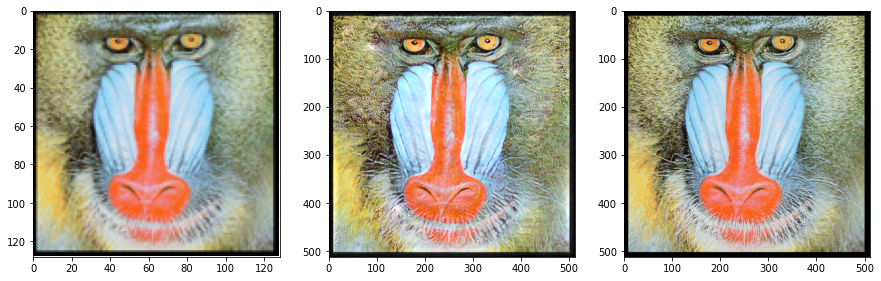

In [7]:
# placeholder code for displaying an image from generator
with torch.no_grad():
    img_lr = datahandler.get_sample_by_name('baboon', 128)
    img_hr = datahandler.get_sample_by_name('baboon', 512)
    fig, ax = plt.subplots(1, 3, figsize=(15,15))
    display_image(ax[0], img_lr)
    display_image(ax[1], generator.forward(torch.unsqueeze(img_lr.cuda().detach(), 0))[-1].cpu(), reverse_normalization=True)
    display_image(ax[2], img_hr)